In [125]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import Trace, Stream
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

array = np.arange(0,10,0.01)
trace = Trace(array)
trace.stats
trace.stats.starttime = UTCDateTime('1970-01-01T00:00:00')
trace.stats

         network: 
         station: 
        location: 
         channel: 
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:16:39.000000Z
   sampling_rate: 1.0
           delta: 1.0
            npts: 1000
           calib: 1.0

In [117]:
time = UTCDateTime('1971-1-2T04:05:06')
time.time
# time.julday
# time.year
# time.month
# time.date
# time.datetime
# time.day
time + 3600
print(time)

1971-01-02T04:05:06.000000Z


In [124]:
meta = {'station': 'MANZ', 'network': 'BW', 'channel': 'EHZ', 'location':'Vietnam'}
tr = Trace(header=meta)
tr.stats

         network: BW
         station: MANZ
        location: Vietnam
         channel: EHZ
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:00:00.000000Z
   sampling_rate: 1.0
           delta: 1.0
            npts: 0
           calib: 1.0

In [123]:
tr.count()

0

In [167]:
client = Client('IRIS')
net = "IU"
sta = "TUC"
loc = "00"
chan = "HH*"
time = UTCDateTime("2019-07-06T03:19:53.04")
starttime = time - 60
endtime = time + 60*15

st = client.get_waveforms(net, sta, loc, chan, starttime, endtime)
# st.plot()

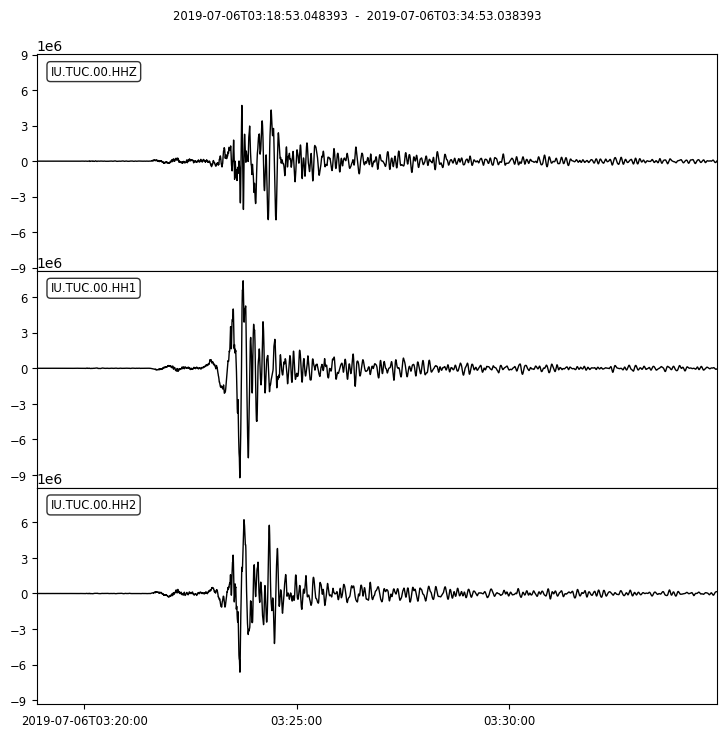

In [168]:
st.plot();

In [144]:
st.traces[0].stats


               network: IU
               station: TUC
              location: 00
               channel: HH1
             starttime: 2019-07-06T03:18:53.048393Z
               endtime: 2019-07-06T03:34:53.038393Z
         sampling_rate: 100.0
                 delta: 0.01
                  npts: 96000
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 417, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 647680})
            processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2019, 7, 6, 3, 34, 53, 38393)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2019, 7, 6, 3, 18, 53, 38393))']

In [145]:
st.traces[0].normalize()

IU.TUC.00.HH1 | 2019-07-06T03:18:53.048393Z - 2019-07-06T03:34:53.038393Z | 100.0 Hz, 96000 samples

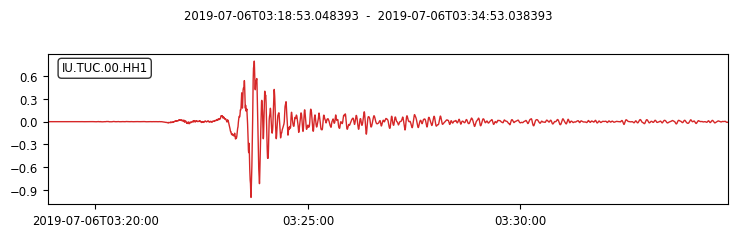

'MSEED'

In [153]:
st.traces[0].plot(color='tab:red')
st.traces[0].stats._format

In [175]:
# st.traces[0]
# st
# st.traces[0] + st.traces[1] + st.traces[2]
# x = st.traces[0] + st.traces[1]
# x.plot();
# st.plot();
st.traces[0].get_id()

'IU.TUC.00.HH1'

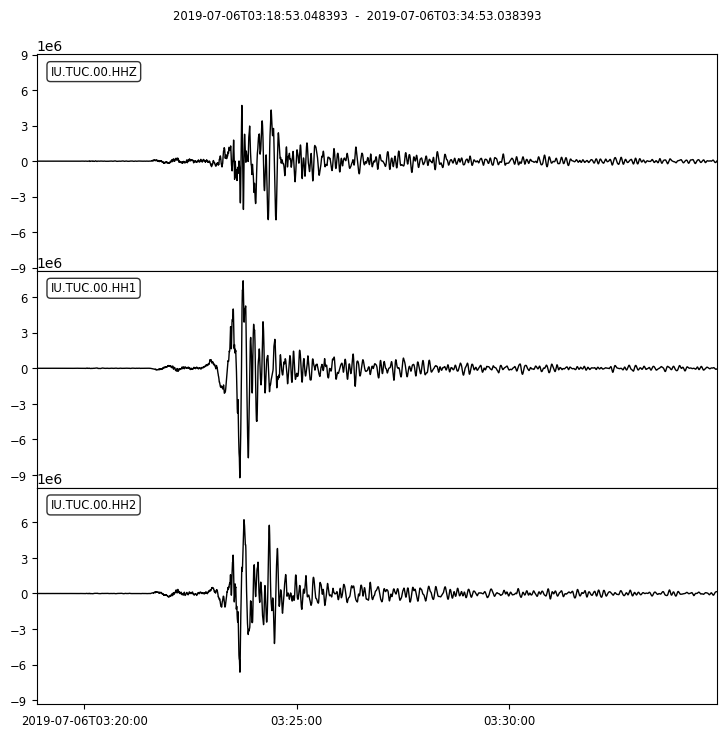

In [179]:
st.plot();

1 Trace(s) in Stream:
IU.TUC.00.HH1 | 2019-07-06T03:18:53.048393Z - 2019-07-06T03:34:53.038393Z | 100.0 Hz, 96000 samples


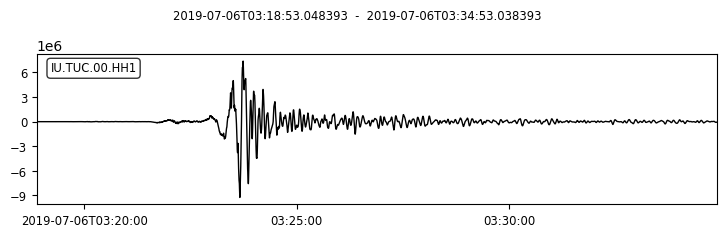

In [187]:
time = UTCDateTime("2019-07-06T03:19:53.04")
starttime = time - 60 
endtime = time + 60*15

net = "IU"
sta = "TUC"
loc = "00"
chan = "HH1"
st = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)
print(st)
st.plot();

1 Trace(s) in Stream:
IU.TUC.00.HH1 | 2019-07-06T03:18:53.048393Z - 2019-07-06T03:34:53.038393Z | 100.0 Hz, 96000 samples
1 Trace(s) in Stream:
IU.TUC.00.HH1 | 2019-07-06T03:18:53.048393Z - 2019-07-06T03:34:53.038393Z | 100.0 Hz, 96000 samples


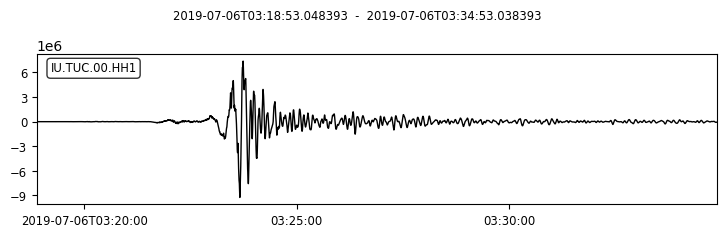

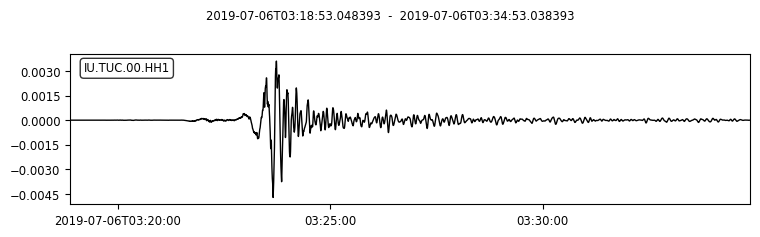

In [183]:
st_rem = st.copy()
print(st)
print(st_rem)
st_rem.remove_response(output = 'VEL') # other options: output = 'DISP', 'ACC'

st.plot()
st_rem.plot();

1 Trace(s) in Stream:
IU.TUC.00.HH1 | 2019-07-06T03:18:53.048393Z - 2019-07-06T03:34:53.038393Z | 100.0 Hz, 96000 samples
1 Trace(s) in Stream:
IU.TUC.00.HH1 | 2019-07-06T03:18:53.048393Z - 2019-07-06T03:34:53.038393Z | 100.0 Hz, 96000 samples


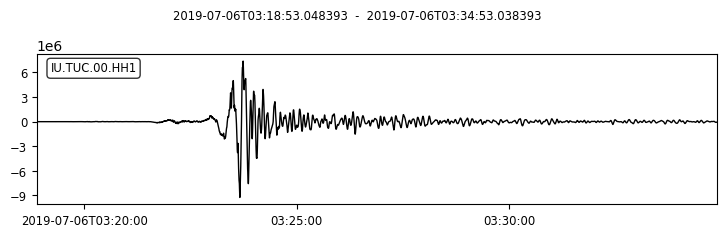

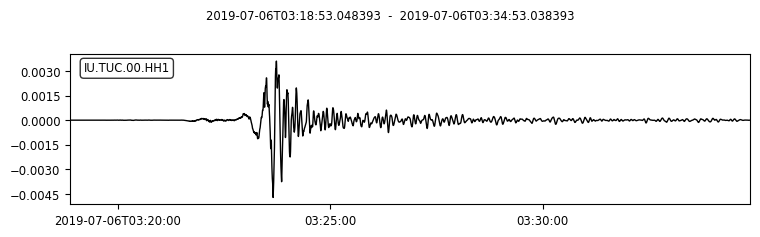

In [185]:
st_rem = st.copy()
print(st)
print(st_rem)
st_rem.remove_response(output = 'VEL') # other options: output = 'DISP', 'ACC'

st.plot()
st_rem.plot();

In [193]:
inventory = client.get_events(net, sta, loc, chan, starttime, endtime)
inventory.plot()

TypeError: 'IU' could not be converted to type 'UTCDateTime'.